In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

We first load the datasets independtly and clean them a bit.

In [9]:
# load the datasets for living cost in USA
living_cost_USA = pd.read_csv("data/living_cost_USA.csv", sep=",")

In [235]:
# load the datasets for living cost in USA by STATE
living_cost_USA_by_STATE = pd.read_csv("data/living_cost_USA_by_STATE.csv", sep=",")

In [16]:
# load the datasets for pizzas
# pizza_places = pd.read_csv("data/db_main.csv")
pizza_places = pd.read_csv("data/Datafiniti_Pizza_Restaurants_and_the_Pizza_They_Sell_Jun19.csv", sep=",")

In [238]:
pizza_places.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.currency',
       'menus.dateSeen', 'menus.description', 'menus.name', 'name',
       'postalCode', 'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax',
       'province'],
      dtype='object')

In [17]:
pizza_places_resume = pizza_places[['name', 'menus.name', 'province', 'menus.amountMax']]

In [111]:
pizza_places_resume.sample(3)

,name,menus.name,province,menus.amountMax
8376,Sal's Pizzeria,Slice Deluxe Pizza,VA,3.25
8017,La Villa Roma,Bbq Chicken Pizza,VA,15.99
4858,Fresh Brothers,Da Works Pizza,CA,21.99


In [83]:
# load the datasets for pizza ingredients
pizza_with_ingredients = pd.read_csv("data/pizzas.csv", sep=";")

In [91]:
pizza_with_ingredients = pizza_with_ingredients[['pizza_name', 'pizza_category','pizza_ingredients']].drop_duplicates().reset_index(drop=True)

In [93]:
pizza_with_ingredients.sample(3)

,pizza_name,pizza_category,pizza_ingredients
30,"The Pepperoni, Mushroom, and Peppers Pizza",Classic,"Pepperoni, Mushrooms, Green Peppers"
9,The Spinach Supreme Pizza,Supreme,"Spinach, Red Onions, Pepperoni, Tomatoes, Arti..."
16,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------


Now we will try to attach to construct a pizza index from theses datasets in order to make comparison between the states.

- First we have to build a mean of pizza prices by states.
- Then we can (as the bigmac_index) compare 2 states by applying the following : mean_price_A / mean_price_B
- Then, for each state we can make a mean of all it's pizza_index with all the other states.
- Finally we can compare it to the cost of living in the USA and see how similar the results are.

In [191]:
# mean of the prices by STATE
mean_price_by_state = pizza_places_resume[['province', 'menus.amountMax']].groupby(['province']).mean().rename(columns={"menus.amountMax": "mean_price"})

In [192]:
mean_price_by_state.sample(3)

,mean_price
province,
TN,12.239848
CO,12.260580
IN,11.293105


In [193]:
mean_price_by_state_sorted = mean_price_by_state.sort_values(['mean_price'], ascending=False)

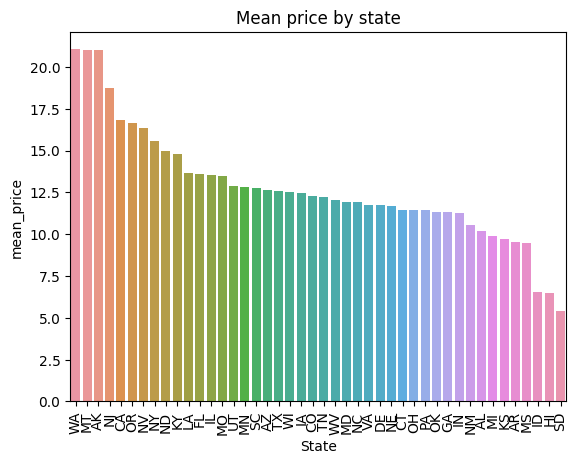

In [194]:
sns.barplot(x=mean_price_by_state_sorted.index, y='mean_price', data=mean_price_by_state_sorted, errorbar=None)
plt.xlabel('State')
plt.ylabel('mean_price')
plt.title('Mean price by state')
plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees
plt.show()

We can see that the more expensive states are Washington, Montana and Alaska.

- Now we will design a way to compute the so called pizza_index the same way as the bigmax_index.

In [195]:
def compute_pizza_index_btw_two_states(dataframe, stateA, stateB):
    A = dataframe.at[stateA, 'mean_price']
    B = dataframe.at[stateB, 'mean_price']
    return A/B

In [196]:
compute_pizza_index_btw_two_states(mean_price_by_state, "MT", "AZ")

1.6574727389352149

In [197]:
# Compute a matrix that has all the pizza_index values

# list of all the states
state_list = mean_price_by_state.index.tolist()
numer_of_states = len(state_list)

In [198]:
# construct a matrix with theses values
pizza_index_matrix = np.zeros((numer_of_states,numer_of_states))
for i in range(numer_of_states):
    a = state_list[i]
    for j in range(numer_of_states):
        b = state_list[j]
        pizza_index_matrix[i][j] = compute_pizza_index_btw_two_states(mean_price_by_state, a, b)

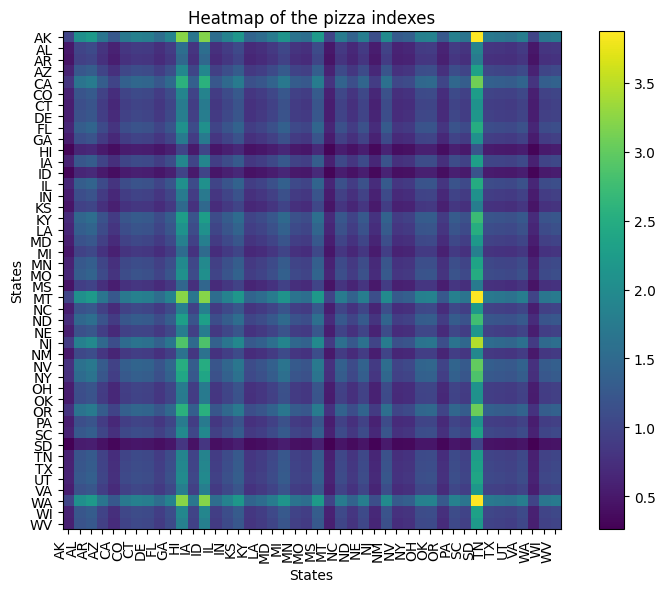

In [206]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.imshow(pizza_index_matrix, cmap='viridis')
plt.colorbar()

plt.xticks(np.arange(numer_of_states), state_list, rotation=90, ha='right')
plt.yticks(np.arange(numer_of_states), state_list)

plt.xlabel('States')
plt.ylabel('States')
plt.title('Heatmap of the pizza indexes')

plt.subplots_adjust(bottom=0.05)

plt.show()

In [225]:
pizza_index_means = []

for i in range(numer_of_states):
    mean = (pizza_index_matrix[i].sum() -1) / (numer_of_states -1)
    pizza_index_means.append(mean)

In [226]:
pizza_index = pd.DataFrame({'pizza_index': pizza_index_means}, index=state_list)

In [230]:
pizza_index.sample(3)

,pizza_index
UT,1.091898
IN,0.953562
CT,0.967133


In [232]:
pizza_index_sorted = pizza_index.sort_values(['pizza_index'], ascending=False)

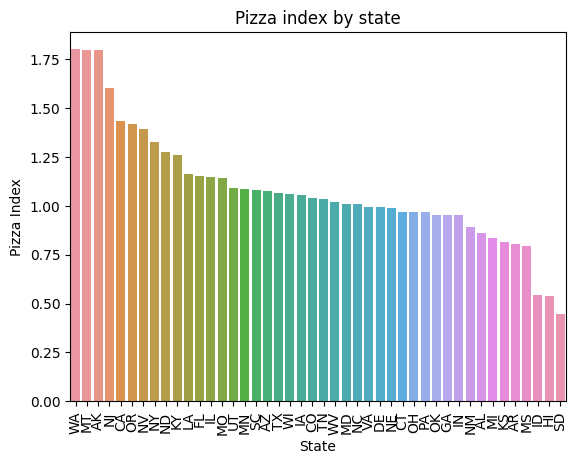

In [233]:
sns.barplot(x=pizza_index_sorted.index, y='pizza_index', data=pizza_index_sorted, errorbar=None)
plt.xlabel('State')
plt.ylabel('Pizza Index')
plt.title('Pizza index by state')
plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees
plt.show()

In [236]:
living_cost_USA_by_STATE

,State,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,HI,15.000000,93.720000,63.960000,79.630000,96.320000,86.720000,113.580000
1,AK,16.000000,93.190000,39.450000,67.750000,96.740000,78.760000,138.380000
2,DC,18.000000,88.500000,70.280000,79.870000,86.630000,86.230000,131.530000
3,NJ,29.000000,84.080000,61.580000,73.430000,86.080000,81.440000,120.460000
4,MA,37.000000,80.460000,76.090000,78.390000,75.710000,83.080000,124.570000
5,CT,41.000000,79.850000,41.580000,61.730000,83.410000,72.820000,84.710000
6,NY,90.666667,79.680000,50.956667,66.081667,76.110000,81.040000,98.843333
7,CA,77.923077,78.033077,62.906154,70.873077,73.527692,81.199231,133.499231
8,PA,55.000000,77.645000,43.790000,61.625000,73.235000,70.745000,111.810000
9,SC,114.500000,76.550000,36.925000,57.795000,78.230000,70.280000,115.450000
